# ***Processing with ln(T_ag Sr-90) data in stem woody biomass for forest sites***

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Block warnings messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load biomass dataset
site_data = './../02_input_data/RN_sites_data_2024.xlsx'
df = pd.read_excel(site_data, sheet_name='RN_filtration_data')
df.head()

,Ідентифікатор,Site #,Species,Species_ID,Ntrees at site,% composition,D_cm,H_m,G_m2_ha,N_ha,...,T_ag_Cs,ln_T_ag_Cs,T_ag_Sr,ln_T_ag_Sr,AEDR_count,AEDR_mean,AEDR_median,AEDR_std,Distance_km,Azimuth
0,81,001_2021,Pine,0,23,100.000000,26.060965,25.423284,49.081648,920,...,0.792857,-0.232112,8.990000,2.196113,26,3.524231,3.530,0.235489,5.926403,249
1,219,002_2021,Pine,0,60,90.178571,4.303100,4.705979,8.731641,6000,...,1.565517,0.448216,24.191919,3.186019,15,3.830667,3.780,0.166272,6.018960,249
2,224,003_2021,Pine,0,44,100.000000,28.142898,27.556869,54.703060,880,...,0.431579,-0.840305,6.800000,1.916923,28,0.483571,0.475,0.068931,13.046428,189
3,228,004_2021,Pine,0,23,100.000000,14.953551,8.506028,40.420188,2300,...,0.123529,-2.091276,2.460000,0.900161,20,0.364500,0.365,0.029576,12.741627,189
4,232,005_2021,Pine,0,26,100.000000,7.208435,3.425669,2.120687,520,...,0.221212,-1.508633,6.629225,1.891488,18,0.333333,0.345,0.036515,12.893213,189


In [4]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_ha',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'ln_T_ag_Cs', 'ln_T_ag_Sr'])
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin,Origin_ID,A_year,D_live_cm,H_live_m,G_live_m2_ha,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,ln_T_ag_Cs,ln_T_ag_Sr
0,Pine,0,100.000000,26.060965,25.423284,49.081648,a,1,68,26.060965,25.423284,49.081648,1,2,3.524231,5.926403,249,-0.232112,2.196113
1,Pine,0,90.178571,4.303100,4.705979,8.731641,n,0,15,4.494076,4.874017,9.682612,1,2,3.830667,6.018960,249,0.448216,3.186019
2,Pine,0,100.000000,28.142898,27.556869,54.703060,n,0,69,28.142898,27.556869,54.703060,1,2,0.483571,13.046428,189,-0.840305,1.916923
3,Pine,0,100.000000,14.953551,8.506028,40.420188,n,0,15,14.953551,8.506028,40.420188,2,2,0.364500,12.741627,189,-2.091276,0.900161
4,Pine,0,100.000000,7.208435,3.425669,2.120687,n,0,10,7.208435,3.425669,2.120687,2,2,0.333333,12.893213,189,-1.508633,1.891488


# Pre-analysis of parameters

In [5]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        209 non-null    object 
 1   Species_ID     209 non-null    int64  
 2   % composition  209 non-null    float64
 3   D_cm           209 non-null    float64
 4   H_m            209 non-null    float64
 5   G_m2_ha        209 non-null    float64
 6   Origin         209 non-null    object 
 7   Origin_ID      209 non-null    int64  
 8   A_year         209 non-null    int64  
 9   D_live_cm      209 non-null    float64
 10  H_live_m       209 non-null    float64
 11  G_live_m2_ha   209 non-null    float64
 12  F_Soil_ID      209 non-null    int64  
 13  M_Soil         209 non-null    int64  
 14  AEDR_mean      209 non-null    float64
 15  Distance_km    209 non-null    float64
 16  Azimuth        209 non-null    int64  
 17  ln_T_ag_Cs     209 non-null    float64
 18  ln_T_ag_Sr

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin_ID,A_year,D_live_cm,H_live_m,G_live_m2_ha,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,ln_T_ag_Cs,ln_T_ag_Sr
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1.057416,94.337925,17.770981,16.978858,30.000765,0.454545,47.464115,17.555614,16.999369,31.436810,1.918660,2.220096,2.526858,14.640059,174.296651,-0.696999,2.239622
std,1.524339,14.155594,8.921738,6.832292,15.907971,0.499125,24.724635,8.470174,6.783414,15.470759,0.634039,0.692944,4.756383,12.363729,99.912885,1.294511,0.973844
min,0.000000,20.805369,1.914854,2.704460,0.259356,0.000000,10.000000,1.874874,2.704460,0.656684,1.000000,0.000000,0.110000,3.998568,9.000000,-5.130702,-0.784714
25%,0.000000,96.775081,11.601519,12.401789,17.519173,0.000000,30.000000,12.307179,12.193980,20.938452,2.000000,2.000000,0.460000,6.562497,56.000000,-1.456701,1.633535
50%,0.000000,100.000000,16.817809,17.466646,30.845307,0.000000,45.000000,16.780740,17.365162,31.800484,2.000000,2.000000,0.756000,9.203749,189.000000,-0.608351,2.301556
75%,2.000000,100.000000,22.264253,21.414562,42.817263,1.000000,60.000000,22.023624,21.604236,43.193896,2.000000,3.000000,2.401667,20.865459,261.000000,0.288154,2.867382
max,5.000000,100.000000,52.228464,34.048688,66.922093,1.000000,150.000000,41.664506,33.436497,71.679126,3.000000,4.000000,36.591739,57.286577,342.000000,1.645806,5.227895


In [7]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species","Origin"])["ln_T_ag_Cs","ln_T_ag_Sr"].describe()

ln_T_ag_Cs                                                    \
                    count      mean       std       min       25%       50%   
Species Origin                                                                
Alder   n            13.0 -1.185508  1.201583 -2.903562 -2.230264 -1.122877   
Aspen   n             9.0 -0.949189  1.422814 -2.965427 -1.714798 -0.830609   
Birch   a             8.0 -1.238742  0.573606 -2.171249 -1.511125 -0.996538   
        n            37.0 -1.072352  1.287339 -4.379730 -1.466337 -0.799594   
Oak     a             4.0  0.438224  0.945832 -0.895671  0.254265  0.655261   
        n             3.0 -0.710904  1.252842 -1.788996 -1.398129 -1.007263   
Pine    a            79.0 -0.147652  1.046485 -4.005355 -0.734892  0.159630   
        n            51.0 -0.986392  1.368221 -3.568251 -2.423866 -0.632087   
Red oak a             3.0 -0.746965  0.750754 -1.253902 -1.178204 -1.102506   
Robinia n             1.0 -5.130702       NaN -5.130702 -5.130702 -5.130702   
Spruce  a             1.0 -2.409639       NaN -2.409639 -2.409639 -2.409639   

                                   ln_T_ag_Sr                                \
                     75%       max      count      mean       std       min   
Species Origin                                                                
Alder   n      -0.498161  0.853490       13.0  1.148892  0.672543 -0.167054   
Aspen   n      -0.635356  1.552087        9.0  2.369639  0.638555  1.396245   
Birch   a      -0.842535 -0.725022        8.0  3.048143  1.090532  1.509908   
        n      -0.156654  1.529016       37.0  2.247535  0.746092  0.182322   
Oak     a       0.839220  1.338048        4.0  1.432872  1.282072  0.640961   
        n      -0.171858  0.663547        3.0  1.297559  0.656337  0.549108   
Pine    a       0.520875  1.645806       79.0  2.534808  0.859357 -0.784714   
        n       0.157663  1.295488       51.0  2.059152  1.087896  0.191891   
Red oak a      -0.493496  0.115513        3.0  2.269575  0.547417  1.649582   
Robinia n      -5.130702 -5.130702        1.0  0.758152       NaN  0.758152   
Spruce  a      -2.409639 -2.409639        1.0  1.817077       NaN  1.817077   

                                                        
                     25%       50%       75%       max  
Species Origin                                          
Alder   n       0.672094  1.345444  1.543687  2.133509  
Aspen   n       1.986732  2.194176  2.644537  3.397022  
Birch   a       2.550472  2.991782  3.407080  5.227895  
        n       1.745850  2.370793  2.631089  4.653960  
Oak     a       0.720343  0.873980  1.586510  3.342567  
        n       1.058862  1.568616  1.671784  1.774952  
Pine    a       2.050203  2.594722  3.055839  4.820282  
        n       1.096823  1.916923  3.139421  4.430817  
Red oak a       2.061256  2.472930  2.579571  2.686212  
Robinia n       0.758152  0.758152  0.758152  0.758152  
Spruce  a       1.817077  1.817077  1.817077  1.817077

In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = ["ln_T_ag_Sr"], inplace=True) # IMPOTANT - input name of column
print(select)

    Species  Species_ID  % composition       D_cm        H_m    G_m2_ha  \
0      Pine           0     100.000000  26.060965  25.423284  49.081648   
1      Pine           0      90.178571   4.303100   4.705979   8.731641   
2      Pine           0     100.000000  28.142898  27.556869  54.703060   
3      Pine           0     100.000000  14.953551   8.506028  40.420188   
4      Pine           0     100.000000   7.208435   3.425669   2.120687   
..      ...         ...            ...        ...        ...        ...   
204   Aspen           4      99.930119  11.401754  14.676282  17.972410   
205   Birch           2     100.000000   7.912790  13.818368  19.279495   
206    Pine           0     100.000000  16.041613  17.515821  31.533411   
207    Pine           0      96.775081  14.946465  18.178975  44.220927   
208    Pine           0     100.000000  15.387224  17.673021  55.824342   

    Origin  Origin_ID  A_year  D_live_cm   H_live_m  G_live_m2_ha  F_Soil_ID  \
0        a         

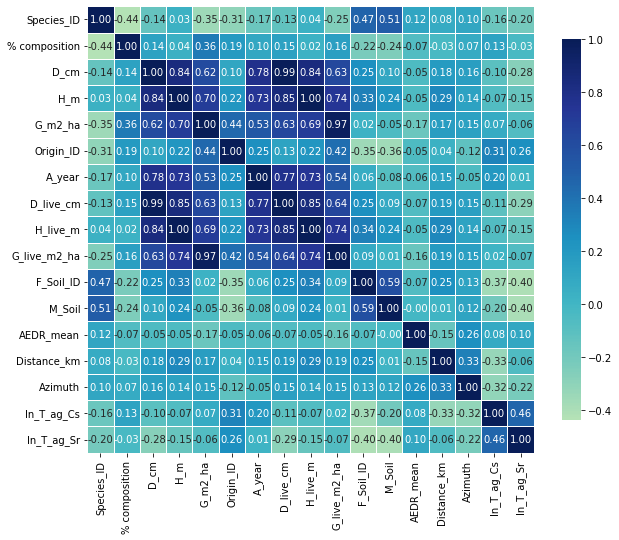

In [9]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [10]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['Species_ID','D_cm', 'H_m', 'G_m2_ha', 'A_year',
                                    'Origin_ID', 'F_Soil_ID', 'M_Soil'])
y = pd.DataFrame(select, columns= ['ln_T_ag_Sr'])

In [11]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_value = np.random.normal(10, 2, size=count)
    X['Random_col'] = norm_value
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [12]:
# Columns in "X" data collections
X.head()

,Species_ID,D_cm,H_m,G_m2_ha,A_year,Origin_ID,F_Soil_ID,M_Soil
0,0,26.060965,25.423284,49.081648,68,1,1,2
1,0,4.303100,4.705979,8.731641,15,0,1,2
2,0,28.142898,27.556869,54.703060,69,0,1,2
3,0,14.953551,8.506028,40.420188,15,0,2,2
4,0,7.208435,3.425669,2.120687,10,0,2,2


In [13]:
# Columns in "y" data collections
y.head()

,ln_T_ag_Sr
0,2.196113
1,3.186019
2,1.916923
3,0.900161
4,1.891488


# Create first XGBoost model for estimate varibiality of output stats

In [14]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [15]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [16]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [17]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.2718824877719578, 0.104372338661196, 0.22536953357082357]
    Mean: 0.201
    Std: 0.071

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.73787839 0.97637211 0.79091646]
    Mean: 0.835
    Std: 0.102

 --------------------
Mean absolute error (MAE): 

    Scores: [0.6035136874952057, 0.7338649717787272, 0.5530347864012588]
    Mean: 0.630
    Std: 0.076

 --------------------


# Find optimal hyperparameters for XGBoost model

In [18]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [19]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=5000, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 5000 candidates, totalling 25000 fits
Model with rank: 1
Mean validation score: 0.304 (std: 0.132)
Parameters: {'colsample_bytree': 0.7327675639923839, 'gamma': 0.04558812083388075, 'learning_rate': 0.10198012556475948, 'max_depth': 2, 'n_estimators': 79, 'subsample': 0.811521748868657}



In [20]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.38744674, 0.38826985, 1.8275774 , ..., 0.16398044, 0.32052031,
       0.3268703 ]), 'std_fit_time': array([0.16833499, 0.05299673, 2.2562972 , ..., 0.01468443, 0.03327946,
       0.00695607]), 'mean_score_time': array([0.00753698, 0.00742569, 0.00649438, ..., 0.00652018, 0.00704966,
       0.00655742]), 'std_score_time': array([2.86966946e-03, 1.70760602e-03, 5.70044166e-04, ...,
       8.52489093e-05, 8.93782946e-04, 1.17560563e-04]), 'param_colsample_bytree': masked_array(data=[0.8986044234981896, 0.3027331393343319,
                   0.3958755085955487, ..., 0.6485212918766124,
                   0.16370213490298485, 0.8317366904909045],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.014274204114911537, 0.3040578452106869,
                   0.4368951304955794, ..., 0.1286805313849816,
                   0.23906891718671303, 0.4953338238368857],
     

In [21]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.7327675639923839
Gamma: 0.04558812083388075
Learning_rate: 0.10198012556475948
Max_depth: 2
N_estimators: 79
Subsample: 0.811521748868657


# Creating a basic XGBoost model

In [22]:
# Generate test and training samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
# Implementation of the scikit-learn API for XGBoost regression
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [24]:
# Show all parameters of XGBoost model
print(xgb_model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7327675639923839, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=['rmse'],
             gamma=0.04558812083388075, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.10198012556475948, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=79, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)


In [25]:
# Fitting the model 
xgb_model.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_train, y_train), (X_test, y_test)])
# learning dynamics
y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.79213	validation_1-rmse:1.90578
[1]	validation_0-rmse:1.64969	validation_1-rmse:1.75405
[2]	validation_0-rmse:1.52147	validation_1-rmse:1.61905
[3]	validation_0-rmse:1.40675	validation_1-rmse:1.50609
[4]	validation_0-rmse:1.29889	validation_1-rmse:1.41413
[5]	validation_0-rmse:1.21185	validation_1-rmse:1.32826
[6]	validation_0-rmse:1.13752	validation_1-rmse:1.26717
[7]	validation_0-rmse:1.07320	validation_1-rmse:1.21864
[8]	validation_0-rmse:1.01502	validation_1-rmse:1.16123
[9]	validation_0-rmse:0.96420	validation_1-rmse:1.11226
[10]	validation_0-rmse:0.90877	validation_1-rmse:1.08108
[11]	validation_0-rmse:0.86721	validation_1-rmse:1.04274
[12]	validation_0-rmse:0.83045	validation_1-rmse:1.01614
[13]	validation_0-rmse:0.80159	validation_1-rmse:0.99118
[14]	validation_0-rmse:0.77492	validation_1-rmse:0.96915
[15]	validation_0-rmse:0.75347	validation_1-rmse:0.94993
[16]	validation_0-rmse:0.73419	validation_1-rmse:0.94017
[17]	validation_0-rmse:0.71734	validation

In [26]:
# Iteration with the best result
optimal_n= xgb_model.best_ntree_limit-1
print("The best iteration: " + str(optimal_n))    

The best iteration: 35


In [27]:
# Preparing data for building a learning graph
results = xgb_model.evals_result()

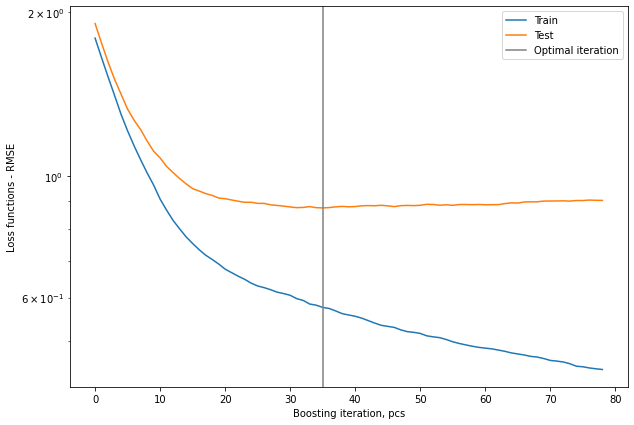

In [28]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(results['validation_0']['rmse'], label='Train')
plt.plot(results['validation_1']['rmse'], label='Test')
plt.axvline(optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a basic XGBoost model

# Test (validation) observations

In [29]:
# Convert data to 'array' type
conv_y_pred = pd.DataFrame(y_pred) # Double transformation
y_pred2 = conv_y_pred.values
y_test2 = y_test.values

# Intermediate results
n_sample = len(y_pred2)
main_sample = y_test.sum() / n_sample

# Calculation of bias
diff = y_pred2 - y_test2
bias = diff.sum()
print('Bias: %.1f' % (bias/n_sample))
print("Relative bias(%):", " %.2f" % (bias/main_sample))

# Calculation of RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %.1f" % (rmse))
print("Relative RMSE(%):", " %.3f" % (rmse/main_sample))

# Calculation of MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.1f" % (mse))

# Calculation of Square R
R_square = r2_score(y_test, y_pred)
print("R square: %.1f%%" % (R_square * 100.0))

Bias: -0.1
Relative bias(%):  -2.39
RMSE: 0.9
Relative RMSE(%):  0.377
MSE: 0.8
R square: 19.5%


In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert input data
x_test_conv = np.array(y_test)
x_test_convert = np.array([None]*n_sample)
for i in range(n_sample):
    x_test_convert[i] = float(x_test_conv[i])

x_plot = x_test_convert
y_plot = y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 1.682
a1: 0.239
R^2: 0.208
Uncertainty
a0: 1.68+/-0.15
a1: 0.24+/-0.06


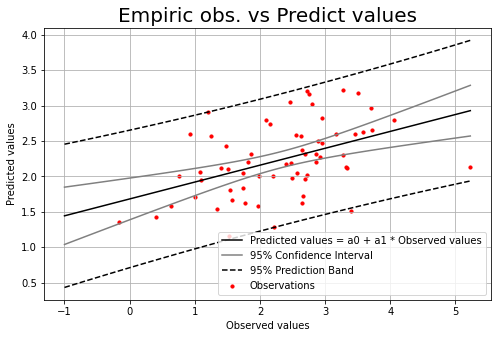

In [32]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# All observations

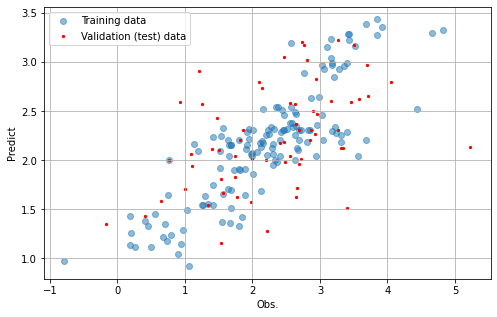

In [33]:
# Comparison of training and testing prediction values for XGBoost model 
y_pred_train = xgb_model.predict(X_train, ntree_limit=xgb_model.best_ntree_limit)

plt.figure(figsize =(8, 5))
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Training data')
plt.scatter(y_test, y_pred, s = 5, c = "red", label='Validation (test) data')
plt.xlabel('Obs.')
plt.ylabel('Predict')
plt.grid(True)
plt.legend(loc='best')

# Estimation training sample

In [34]:
# Convert data to 'array' type
conv_y_pred = pd.DataFrame(y_pred_train) # Double transformation
y_pred_train2 = conv_y_pred.values
y_train2 = y_train.values

# Intermediate results
n_sample = len(y_pred_train2)
main_sample = y_train.sum() / n_sample

# Calculation of bias
diff = y_pred_train2 - y_train2
bias = diff.sum()
print('Bias: %.1f' % (bias/n_sample))
print("Relative bias(%):", " %.2f" % (bias/main_sample))

# Calculation of RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE: %.1f" % (rmse))
print("Relative RMSE(%):", " %.3f" % (rmse/main_sample))

# Calculation of MSE
mse = mean_squared_error(y_train, y_pred_train)
print("MSE: %.1f" % (mse))

# Calculation of Square R
R_square = r2_score(y_train, y_pred_train)
print("R square: %.1f%%" % (R_square * 100.0))

Bias: -0.0
Relative bias(%):  -2.27
RMSE: 0.6
Relative RMSE(%):  0.261
MSE: 0.3
R square: 64.6%


In [35]:
# Convert input data
x_train_conv = np.array(y_train)
x_train_convert = np.array([None]*n_sample)
for i in range(n_sample):
    x_train_convert[i] = float(x_train_conv[i])

x_plot = x_train_convert
y_plot = y_pred_train
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 1.067
a1: 0.500
R^2: 0.709
Uncertainty
a0: 1.07+/-0.06
a1: 0.500+/-0.027


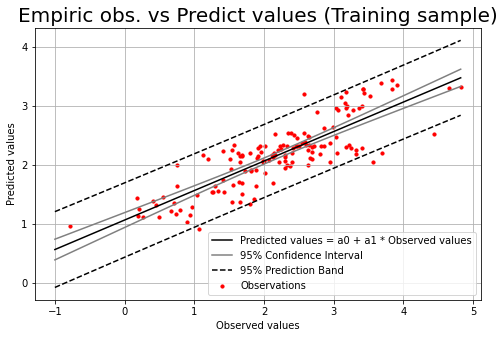

In [36]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values (Training sample)', fontsize=20, color="black")
plt.show()

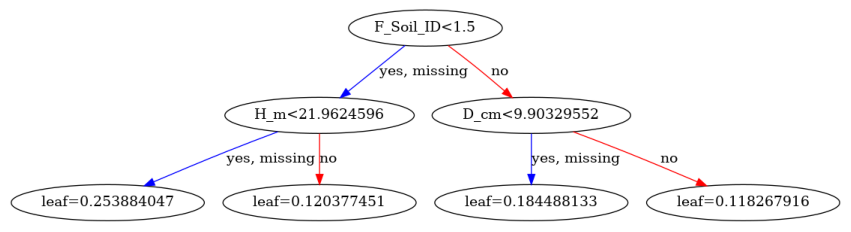

In [38]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(xgb_model,num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [15, 45]
plt.show()

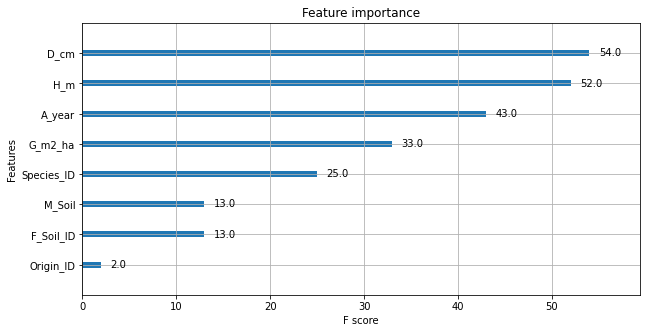

In [40]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

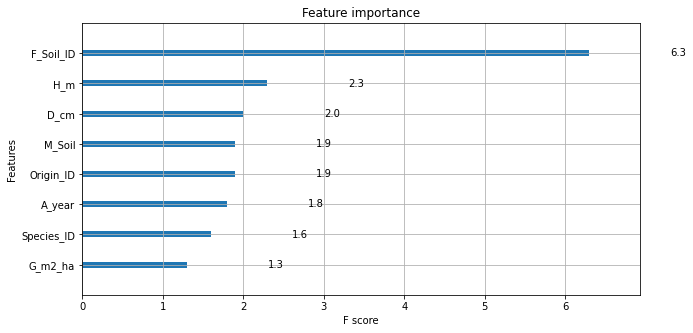

In [41]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

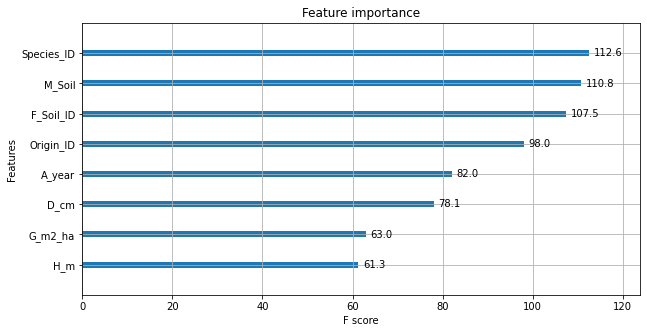

In [42]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [43]:
# Load SHAP`s library
import shap

In [44]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

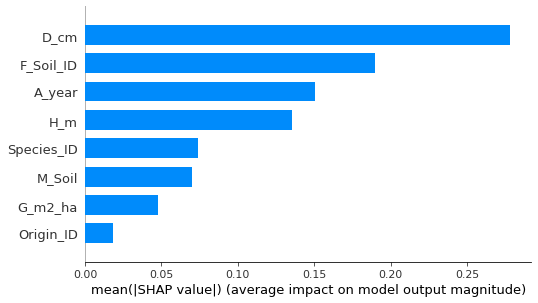

In [45]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, X_train, plot_type="bar")

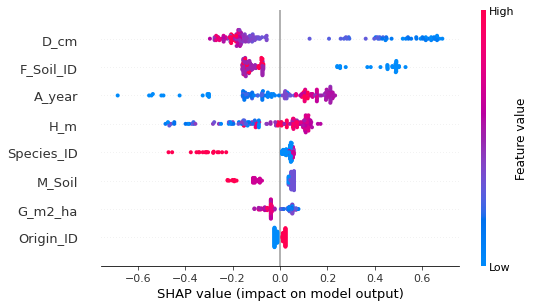

In [46]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, X_train)

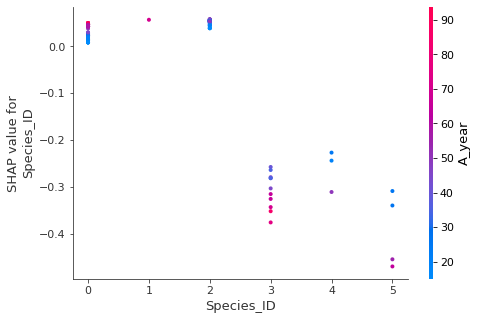

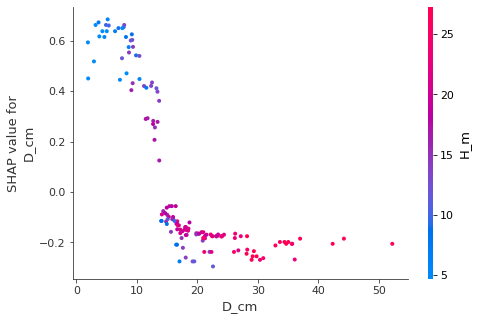

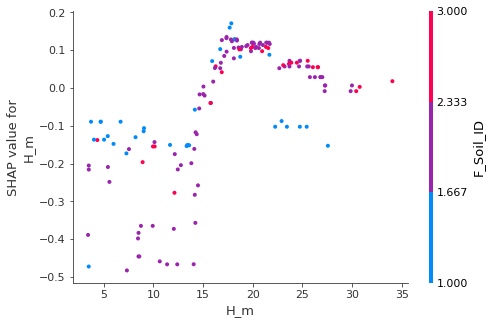

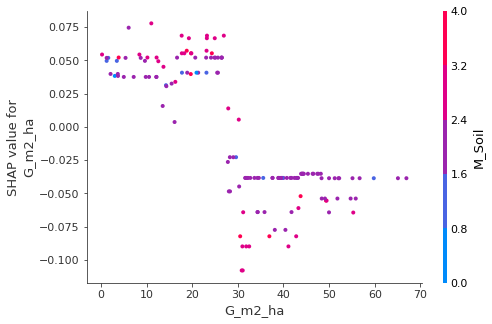

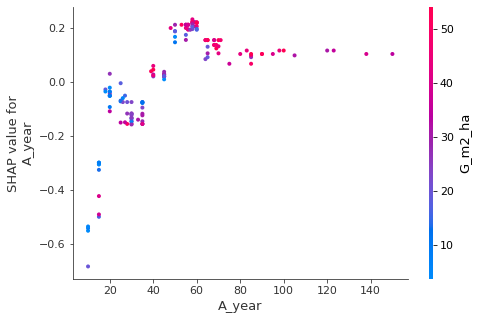

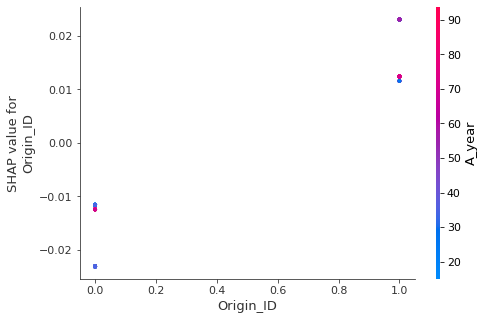

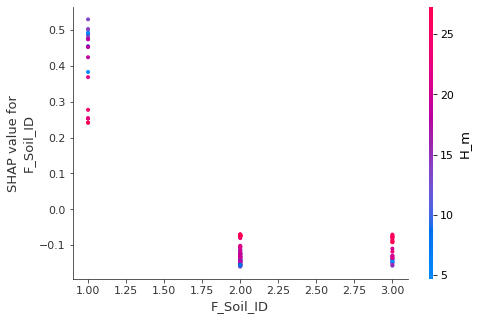

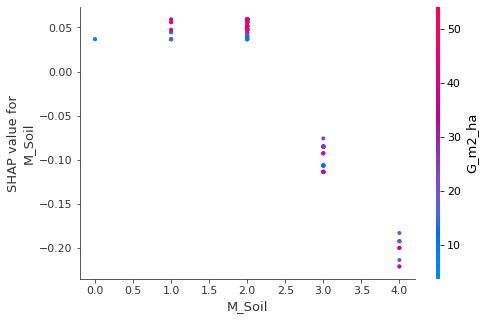

In [47]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X_train, color=shap_values)

# ***Training on all data***

# Creating a final XGBoost model

In [48]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [49]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [50]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.83150
[1]	validation_0-rmse:1.69126
[2]	validation_0-rmse:1.56385
[3]	validation_0-rmse:1.45305
[4]	validation_0-rmse:1.35177
[5]	validation_0-rmse:1.26714
[6]	validation_0-rmse:1.19491
[7]	validation_0-rmse:1.12894
[8]	validation_0-rmse:1.07173
[9]	validation_0-rmse:1.01895
[10]	validation_0-rmse:0.97729
[11]	validation_0-rmse:0.94076
[12]	validation_0-rmse:0.90798
[13]	validation_0-rmse:0.88149
[14]	validation_0-rmse:0.85843
[15]	validation_0-rmse:0.84004
[16]	validation_0-rmse:0.81705
[17]	validation_0-rmse:0.80155
[18]	validation_0-rmse:0.79012
[19]	validation_0-rmse:0.77471
[20]	validation_0-rmse:0.76295
[21]	validation_0-rmse:0.75161
[22]	validation_0-rmse:0.74285
[23]	validation_0-rmse:0.73374
[24]	validation_0-rmse:0.72244
[25]	validation_0-rmse:0.71703
[26]	validation_0-rmse:0.71272
[27]	validation_0-rmse:0.70552
[28]	validation_0-rmse:0.70160
[29]	validation_0-rmse:0.69710
[30]	validation_0-rmse:0.69337
[31]	validation_0-rmse:0.68907
[32]	validation_0-

In [51]:
# Iteration with the best result
f_optimal_n = xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 35


In [52]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

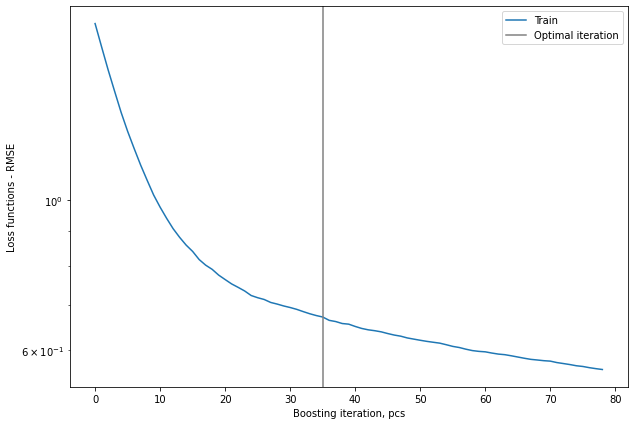

In [53]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [54]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  0.68
RMSE: 0.6
Relative RMSE(%):  0.250
MSE: 0.3
R square: 66.7%


In [55]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 1.003
a1: 0.556
R^2: 0.695
Uncertainty
a0: 1.00+/-0.06
a1: 0.556+/-0.026


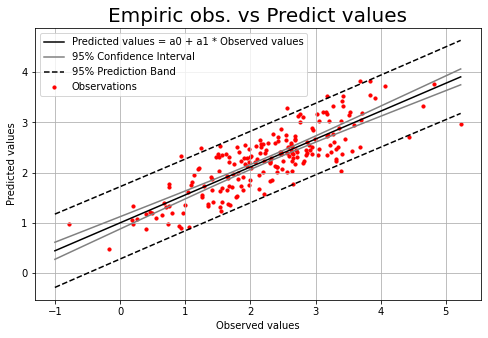

In [57]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# *Save XGBoost model*

In [58]:
# Save to JSON
xgb_model.save_model("./../02_output_data/XGBoost_models/xgb_model_LN_Tag_Sr_2024.json")
# Save to text format
xgb_model.save_model("./../02_output_data/XGBoost_models/xgb_model_LN_Tag_Sr_2024.txt")